# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization,Dropout
from keras.initializers import HeNormal,lecun_normal
from keras.activations import swish, selu

2025-02-04 18:58:34.188114: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 18:58:34.195225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-04 18:58:34.203668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-04 18:58:34.206456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 18:58:34.213215: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1738691917.231513   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738691917.263463   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738691917.263649   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [4]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


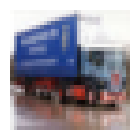

In [5]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)

In [7]:
model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))

I0000 00:00:1738691938.797037   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738691938.797405   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738691938.797564   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738691938.856847   78389 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [8]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc=[]

mejor_acc_val=0
mejor_modelo=None
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo = model
    i+=1

Epoch 1/30


I0000 00:00:1738691944.852504   78499 service.cc:146] XLA service 0x7dbb08002600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738691944.852539   78499 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-04 18:59:04.979420: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-04 18:59:05.193698: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100


  97/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 32.4328 - sparse_categorical_accuracy: 0.0988

I0000 00:00:1738691945.937609   78499 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.4905 - sparse_categorical_accuracy: 0.1474 - val_loss: 2.0504 - val_sparse_categorical_accuracy: 0.2478
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.0175 - sparse_categorical_accuracy: 0.2523 - val_loss: 1.9084 - val_sparse_categorical_accuracy: 0.2956
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8978 - sparse_categorical_accuracy: 0.3062 - val_loss: 1.8313 - val_sparse_categorical_accuracy: 0.3468
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8236 - sparse_categorical_accuracy: 0.3384 - val_loss: 1.7751 - val_sparse_categorical_accuracy: 0.3510
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7597 - sparse_categorical_accuracy: 0.3604 - val_loss: 1.7182 - val_sparse_categorical_accuracy: 0.3792
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7173 - sparse_categorical_accuracy: 0.3766 - val_loss: 1.6854 - val_sparse_categorical_accuracy: 0.4008
Epo

In [9]:
mejor_lr=mejor_modelo.optimizer.learning_rate.numpy()
print(mejor_lr)
print(mejor_acc_val)

0.007
0.4812000095844269


In [10]:
train_loss, train_SC_accuracy = mejor_modelo.evaluate(x_train, y_train)
print("Pérdida:", train_loss, "Precisión:", train_SC_accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 2.3032 - sparse_categorical_accuracy: 0.1001
Pérdida: 2.3032872676849365 Precisión: 0.10013999789953232


In [11]:
val_loss, val_SC_accuracy = mejor_modelo.evaluate(x_val, y_val)
print("Pérdida:", val_loss, "Precisión:", val_SC_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 2.3047 - sparse_categorical_accuracy: 0.0983
Pérdida: 2.3041629791259766 Precisión: 0.09640000015497208


In [12]:
test_loss, test_SC_accuracy = mejor_modelo.evaluate(x_test, y_test)
print("Pérdida:", test_loss, "Precisión:", test_SC_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 2.3025 - sparse_categorical_accuracy: 0.1072
Pérdida: 2.302835702896118 Precisión: 0.10220000147819519


In [13]:
dicc.append({
    'Red neuronal normal': {

        'Tasa de aprendizaje': mejor_modelo.optimizer.learning_rate.numpy(),

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy,

        'Validación sparse categorical accuracy': test_SC_accuracy,

        'Tiempo total (s)': mejor_tiempo

    }
})


In [14]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [15]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=float(mejor_modelo.optimizer.learning_rate.numpy()))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_opti = Sequential()
model_opti.add(Input(shape=(32, 32,3)))
model_opti.add(Flatten())
for _ in range(20):
    model_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_opti.add(Dense(10, activation="softmax"))



model_opti.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history=model_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

train_acc= history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]

   
end_time = time.time()

training_time = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 75.2929 - sparse_categorical_accuracy: 0.1574 - val_loss: 2.0278 - val_sparse_categorical_accuracy: 0.2252
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 40.5882 - sparse_categorical_accuracy: 0.2002 - val_loss: 2.3049 - val_sparse_categorical_accuracy: 0.0958
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3049 - sparse_categorical_accuracy: 0.0959 - val_loss: 2.3045 - val_sparse_categorical_accuracy: 0.0964
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3048 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3039 - val_sparse_categorical_accuracy: 0.0964
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3048 - sparse_categorical_accuracy: 0.0949 - val_loss: 2.3043 - val_sparse_categorical_accuracy: 0.0964
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3042 - sparse_categorical_accuracy: 0.0963 - val_loss: 2.3042 - val_sparse_categorical_a

In [16]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1


dicc.append({
    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': mejor_modelo.optimizer.learning_rate.numpy(),

        'Entrenamiento sparse categorical accuracy': history.history['sparse_categorical_accuracy'][-11],

        'Validación sparse categorical accuracy': history.history['val_sparse_categorical_accuracy'][-11],

        'Tiempo total (s)': training_time,

        'Mejor época': best_epoch

    }
})



In [17]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_lotes = Sequential()
modelo_lotes.add(Input(shape=(32, 32,3)))
modelo_lotes.add(Flatten())

for _ in range(20):
    modelo_lotes.add(BatchNormalization())
    modelo_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
modelo_lotes.add(Dense(10, activation="softmax"))

In [19]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]

mejor_acc_val=0
mejor_modelo=None
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    modelo_lotes.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history_lotes=modelo_lotes.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history_lotes.history['sparse_categorical_accuracy'][-1]
    val_acc = history_lotes.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo_lotes = modelo_lotes
    i+=1

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 2.6337 - sparse_categorical_accuracy: 0.1086 - val_loss: 2.5497 - val_sparse_categorical_accuracy: 0.1414
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2875 - sparse_categorical_accuracy: 0.1532 - val_loss: 2.2482 - val_sparse_categorical_accuracy: 0.1886
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1201 - sparse_categorical_accuracy: 0.2165 - val_loss: 2.0348 - val_sparse_categorical_accuracy: 0.2612
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9863 - sparse_categorical_accuracy: 0.2730 - val_loss: 1.9145 - val_sparse_categorical_accuracy: 0.2984
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8937 - sparse_categorical_accuracy: 0.3086 - val_loss: 1.8233 - val_sparse_categorical_accuracy: 0.3404
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8243 - sparse_categorical_accuracy: 0.3378 - val_loss: 1.7560 - val_sparse_categorical_accuracy

In [20]:
mejor_lr_lotes=mejor_modelo_lotes.optimizer.learning_rate.numpy()
print(mejor_lr_lotes)
print(mejor_acc_val)

0.007
0.4717999994754791


In [21]:
train_loss_lotes, train_SC_accuracy_lotes = mejor_modelo_lotes.evaluate(x_train, y_train)
print("Pérdida:", train_loss_lotes, "Precisión:", train_SC_accuracy_lotes)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 331708.5000 - sparse_categorical_accuracy: 0.6291
Pérdida: 314597.625 Precisión: 0.6294800043106079


In [22]:
val_loss_lotes, val_SC_accuracy_lotes = mejor_modelo_lotes.evaluate(x_val, y_val)
print("Pérdida:", val_loss_lotes, "Precisión:", val_SC_accuracy_lotes)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161239.6562 - sparse_categorical_accuracy: 0.4713
Pérdida: 170999.390625 Precisión: 0.46639999747276306


In [23]:
test_loss_lotes, test_SC_accuracy_lotes = mejor_modelo_lotes.evaluate(x_val, y_val)
print("Pérdida:", test_loss_lotes, "Precisión:", test_SC_accuracy_lotes)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161239.6562 - sparse_categorical_accuracy: 0.4713
Pérdida: 170999.390625 Precisión: 0.46639999747276306


In [24]:
dicc.append({
    'Red neuronal por lotes': {

        'Tasa de aprendizaje': mejor_lr_lotes,

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy_lotes,

        'Validación sparse categorical accuracy': val_SC_accuracy_lotes,

        'Tiempo total (s)': mejor_tiempo

    }
})

In [25]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.6294800043106079, 'Validación sparse categorical accuracy': 0.46639999747276306, 'Tiempo total (s)': 122.81143879890442}}


In [27]:
optimizer_lotes = tf.keras.optimizers.Nadam(learning_rate=float(mejor_lr_lotes))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_lotes_opti = Sequential()
model_lotes_opti.add(Input(shape=(32, 32,3)))
model_lotes_opti.add(Flatten())
for _ in range(20):
    model_lotes_opti.add(BatchNormalization())
    model_lotes_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_lotes_opti.add(Dense(10, activation="softmax"))



model_lotes_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_lotes,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_lotes=model_lotes_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_lotes = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.1577 - sparse_categorical_accuracy: 0.2080 - val_loss: 1.9338 - val_sparse_categorical_accuracy: 0.2834
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9022 - sparse_categorical_accuracy: 0.3003 - val_loss: 1.8936 - val_sparse_categorical_accuracy: 0.3218
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8391 - sparse_categorical_accuracy: 0.3329 - val_loss: 1.9451 - val_sparse_categorical_accuracy: 0.3204
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8046 - sparse_categorical_accuracy: 0.3468 - val_loss: 2.0114 - val_sparse_categorical_accuracy: 0.3414
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7660 - sparse_categorical_accuracy: 0.3640 - val_loss: 1.7817 - val_sparse_categorical_accuracy: 0.3708
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7272 - sparse_categorical_accuracy: 0.3809 - val_loss: 1.8403 - val_sparse_categorical_ac

In [28]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

dicc.append({
    'Red neuronal por lotes con detención temprana': {

        'Tasa de aprendizaje': float(mejor_lr_lotes),

        'Entrenamiento sparse categorical accuracy': history_lotes.history['sparse_categorical_accuracy'][-11],

        'Validación sparse categorical accuracy': history_lotes.history['val_sparse_categorical_accuracy'][-11],

        'Tiempo total (s)': training_time_lotes,

        'Mejor época': best_epoch

    }
})

In [29]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.6294800043106079, 'Validación sparse categorical accuracy': 0.46639999747276306, 'Tiempo total (s)': 122.81143879890442}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.6149399876594543, 'Validación sparse categorical accuracy': 0.4846000075340271, 'Tiempo total (s)': 101.38924956321716, 'Mejor época': 13}}


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [30]:
x_train_norm = (x_train - np.average(x_train)) / (np.std(x_train))
x_val_norm = (x_val - np.average(x_val)) / (np.std(x_val))
x_test_norm = (x_test - np.average(x_test)) / (np.std(x_test))

y_train_norm = (y_train - np.average(y_train)) / (np.std(y_train))
y_val_norm = (y_val - np.average(y_val)) / (np.std(y_val))
y_test_norm = (y_test - np.average(y_test)) / (np.std(y_test))

In [32]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_selu = Sequential()
modelo_selu.add(Input(shape=(32, 32,3)))
modelo_selu.add(Flatten())
for _ in range(20):
    modelo_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
modelo_selu.add(Dense(10, activation="softmax"))
    

In [ ]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]

mejor_acc_val=0
mejor_modelo=None
    
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    modelo_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history_selu=modelo_selu.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history_selu.history['sparse_categorical_accuracy'][-1]
    val_acc = history_selu.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo_selu = modelo_selu

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0342 - sparse_categorical_accuracy: 0.2495 - val_loss: 1.8050 - val_sparse_categorical_accuracy: 0.3364
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7791 - sparse_categorical_accuracy: 0.3512 - val_loss: 1.6938 - val_sparse_categorical_accuracy: 0.3882
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6826 - sparse_categorical_accuracy: 0.3903 - val_loss: 1.6402 - val_sparse_categorical_accuracy: 0.4160
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6232 - sparse_categorical_accuracy: 0.4147 - val_loss: 1.6158 - val_sparse_categorical_accuracy: 0.4210
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5856 - sparse_categorical_accuracy: 0.4263 - val_loss: 1.5916 - val_sparse_categorical_accuracy: 0.4352
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5536 - sparse_categorical_accuracy: 0.4372 - val_loss: 1.5659 - val_sparse_categorical_accuracy:

In [35]:
mejor_lr_selu=mejor_modelo_selu.optimizer.learning_rate.numpy()
print(mejor_lr_selu)
print(mejor_acc_val)

0.007
0.48899999260902405


In [36]:
train_loss_selu, train_SC_accuracy_selu = mejor_modelo_selu.evaluate(x_train, y_train)
print("Pérdida:", train_loss_selu, "Precisión:", train_SC_accuracy_selu)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - loss: 2.4352 - sparse_categorical_accuracy: 0.1006
Pérdida: 2.434248208999634 Precisión: 0.09984000027179718


In [37]:
val_loss_selu, val_SC_accuracy_selu = mejor_modelo_selu.evaluate(x_val, y_val)
print("Pérdida:", val_loss_selu, "Precisión:", val_SC_accuracy_selu)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 2.4176 - sparse_categorical_accuracy: 0.1162
Pérdida: 2.428900718688965 Precisión: 0.10719999670982361


In [38]:
test_loss_selu, test_SC_accuracy_selu = mejor_modelo_selu.evaluate(x_test, y_test)
print("Pérdida:", test_loss_selu, "Precisión:", test_SC_accuracy_selu)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 2.4338 - sparse_categorical_accuracy: 0.0899
Pérdida: 2.4402480125427246 Precisión: 0.09440000355243683


In [39]:
dicc.append({
    'Red neuronal selu': {

        'Tasa de aprendizaje': mejor_lr_selu,

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy_selu,

        'Validación sparse categorical accuracy': val_SC_accuracy_selu,

        'Tiempo total (s)': mejor_tiempo

    }
})

In [40]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.6294800043106079, 'Validación sparse categorical accuracy': 0.46639999747276306, 'Tiempo total (s)': 122.81143879890442}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.6149399876594543, 'Validación sparse categorical accuracy': 0.4846000075340271, 'Tiempo total (s)': 101.38924956321716, 'Mejor época': 13}}
{

In [42]:
optimizer_selu = tf.keras.optimizers.Nadam(learning_rate=float(mejor_lr_selu))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_selu_opti = Sequential()
model_selu_opti.add(Input(shape=(32, 32,3)))
model_selu_opti.add(Flatten())
for _ in range(20):
    model_selu_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu_opti.add(Dense(10, activation="softmax"))

model_selu_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_selu,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_selu=model_selu_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_selu = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.9485 - sparse_categorical_accuracy: 0.1348 - val_loss: 2.3650 - val_sparse_categorical_accuracy: 0.1072
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3649 - sparse_categorical_accuracy: 0.1014 - val_loss: 2.3870 - val_sparse_categorical_accuracy: 0.1072
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2691.0349 - sparse_categorical_accuracy: 0.1014 - val_loss: 2.3177 - val_sparse_categorical_accuracy: 0.0966
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3212 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3256 - val_sparse_categorical_accuracy: 0.0966
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3274 - sparse_categorical_accuracy: 0.0972 - val_loss: 2.3256 - val_sparse_categorical_accuracy: 0.0978
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3334 - sparse_categorical_accuracy: 0.0978 - val_loss: 2.3184 - val_sparse_categorical_

In [44]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1



dicc.append({
    'Red neuronal selu con detención temprana': {

        'Tasa de aprendizaje': mejor_lr_selu,

        'Entrenamiento sparse categorical accuracy': history_selu.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_selu.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_selu,

        'Mejor época': best_epoch

    }
})

In [45]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.6294800043106079, 'Validación sparse categorical accuracy': 0.46639999747276306, 'Tiempo total (s)': 122.81143879890442}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.6149399876594543, 'Validación sparse categorical accuracy': 0.4846000075340271, 'Tiempo total (s)': 101.38924956321716, 'Mejor época': 13}}
{

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [46]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_dropout = Sequential()
model_dropout.add(Input(shape=(32, 32,3)))
model_dropout.add(Flatten())
for _ in range(20):
    model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))
    

In [47]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]

mejor_acc_val=0
mejor_modelo=None
    
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history_dropout=model_dropout.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history_dropout.history['sparse_categorical_accuracy'][-1]
    val_acc = history_dropout.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo_dropout = model_dropout

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.2024 - sparse_categorical_accuracy: 0.2114 - val_loss: 1.9495 - val_sparse_categorical_accuracy: 0.2892
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8443 - sparse_categorical_accuracy: 0.3293 - val_loss: 1.7003 - val_sparse_categorical_accuracy: 0.3822
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7381 - sparse_categorical_accuracy: 0.3700 - val_loss: 1.6613 - val_sparse_categorical_accuracy: 0.3958
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6773 - sparse_categorical_accuracy: 0.3960 - val_loss: 1.6433 - val_sparse_categorical_accuracy: 0.4126
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6319 - sparse_categorical_accuracy: 0.4104 - val_loss: 1.6079 - val_sparse_categorical_accuracy: 0.4290
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6005 - sparse_categorical_accuracy: 0.4275 - val_loss: 1.5688 - val_sparse_categorical_accuracy:

In [48]:
mejor_lr_dropout=mejor_modelo_dropout.optimizer.learning_rate.numpy()
print(mejor_lr_dropout)
print(mejor_acc_val)

0.007
0.4674000144004822


In [49]:
train_loss_dropout, train_SC_accuracy_dropout = mejor_modelo_dropout.evaluate(x_train, y_train)
print("Pérdida:", train_loss_dropout, "Precisión:", train_SC_accuracy_dropout)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - loss: 2.4211 - sparse_categorical_accuracy: 0.1006
Pérdida: 2.421083688735962 Precisión: 0.09984000027179718


In [50]:
val_loss_dropout, val_SC_accuracy_dropout = mejor_modelo_dropout.evaluate(x_val, y_val)
print("Pérdida:", val_loss_dropout, "Precisión:", val_SC_accuracy_dropout)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 2.4038 - sparse_categorical_accuracy: 0.1162
Pérdida: 2.4146907329559326 Precisión: 0.10719999670982361


In [51]:
test_loss_dropout, test_SC_accuracy_dropout = mejor_modelo_dropout.evaluate(x_test, y_test)
print("Pérdida:", test_loss_dropout, "Precisión:", test_SC_accuracy_dropout)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 2.4222 - sparse_categorical_accuracy: 0.0899
Pérdida: 2.4269602298736572 Precisión: 0.09440000355243683


In [52]:
dicc.append({
    'Red neuronal dropout': {

        'Tasa de aprendizaje': mejor_lr_dropout,

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy_dropout,

        'Validación sparse categorical accuracy': val_SC_accuracy_dropout,

        'Tiempo total (s)': mejor_tiempo

    }
})

In [53]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.6294800043106079, 'Validación sparse categorical accuracy': 0.46639999747276306, 'Tiempo total (s)': 122.81143879890442}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.6149399876594543, 'Validación sparse categorical accuracy': 0.4846000075340271, 'Tiempo total (s)': 101.38924956321716, 'Mejor época': 13}}
{

In [54]:
optimizer_dropout = tf.keras.optimizers.Nadam(learning_rate=float(mejor_lr_dropout))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_dropout_opti = Sequential()
model_dropout_opti.add(Input(shape=(32, 32,3)))
model_dropout_opti.add(Flatten())
for _ in range(20):
    model_dropout_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout_opti.add(Dense(10, activation="softmax"))

model_dropout_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_dropout,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_dropout=model_dropout_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_dropout = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.4749 - sparse_categorical_accuracy: 0.1036 - val_loss: 2.3298 - val_sparse_categorical_accuracy: 0.1072
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3662 - sparse_categorical_accuracy: 0.0987 - val_loss: 2.3462 - val_sparse_categorical_accuracy: 0.1072
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3656 - sparse_categorical_accuracy: 0.1009 - val_loss: 2.3765 - val_sparse_categorical_accuracy: 0.1072
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3699 - sparse_categorical_accuracy: 0.1023 - val_loss: 2.4101 - val_sparse_categorical_accuracy: 0.1072
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3740 - sparse_categorical_accuracy: 0.1034 - val_loss: 2.4361 - val_sparse_categorical_accuracy: 0.0964
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3774 - sparse_categorical_accuracy: 0.1015 - val_loss: 2.4236 - val_sparse_categorical_acc

In [55]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

dicc.append({
    'Red neuronal dropout con detención temprana': {

        'Tasa de aprendizaje': float(mejor_lr_dropout),

        'Entrenamiento sparse categorical accuracy': history_dropout.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_dropout.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_dropout,

        'Mejor época': best_epoch

    }
})

In [56]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 71.65057897567749}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 31.89001727104187, 'Mejor época': 1}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.6294800043106079, 'Validación sparse categorical accuracy': 0.46639999747276306, 'Tiempo total (s)': 122.81143879890442}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.6149399876594543, 'Validación sparse categorical accuracy': 0.4846000075340271, 'Tiempo total (s)': 101.38924956321716, 'Mejor época': 13}}
{